In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## Rejection sampling 

In [2]:
# we need to defin c for distn - this is a difficult task
# Algorithm for random sampler

1. Choose a density q(θ) that is easy to sample from
2. Find a constant c such that 1 ≥ p(θ)/cq(θ) for all θ
3. Sample a proposal θ from proposal distribution q(θ)
4. Sample a uniform deviate u from the interval [0,1]
5. Reject the proposal if u <= p(θ)/cq(θ) , accept otherwise
6. Repeat steps 3, 4, and 5 until desired number of samples is reached; each accepted
sample is a draw from p(θ)


In [3]:
#this function is the numerator of the target distribution
def f(x):
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    else: 
        return np.exp((x-1)/3) + np.exp((x-1)**3)

In [4]:
#normal PDF
def g(x, mu, sigma):
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

In [5]:
NORM_CONST = 7.16556 #really hard to calculate this 

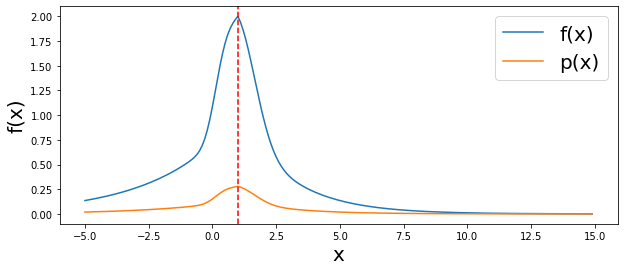

In [6]:
x_vals = np.arange(-5,15,.1)
f_vals = [f(x) for x in x_vals]
p_vals = [f/NORM_CONST for f in f_vals] # dividing f with the norming const to get target distribution

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['f(x)', 'p(x)'], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.axvline(1, color='r', linestyle='--')

In [7]:
TRUE_EXPECTATION = 1.94709 / NORM_CONST
print(TRUE_EXPECTATION)

0.2717289367474419


## Case 1  - with proposal distribution - N(0,3)

Text(0.5, 1.0, 'M=1')

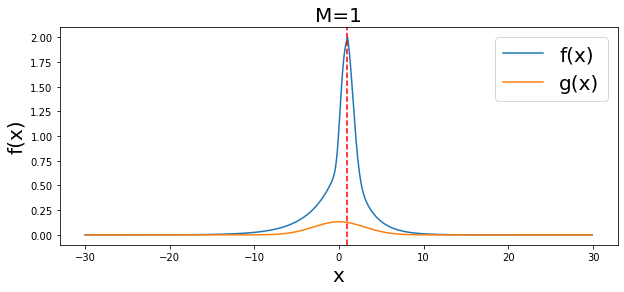

In [8]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 0,3)  
M = 1

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, g_vals)
plt.legend(['f(x)', 'g(x)' ], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.axvline(1, color='r', linestyle='--')

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=10')

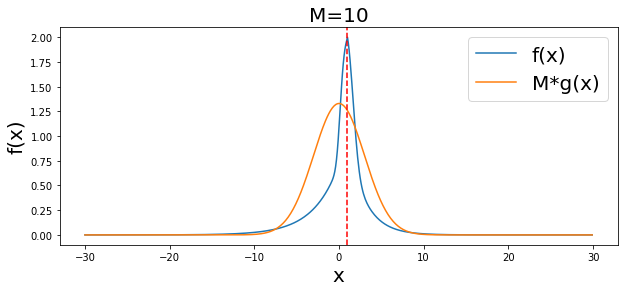

In [9]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
M = 10
g_vals = M*g(x_vals, 0,3)  


plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, g_vals)
plt.legend(['f(x)', 'M*g(x)' ], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.axvline(1, color='r', linestyle='--')

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=20')

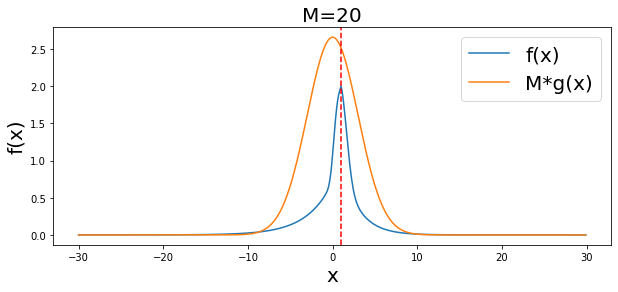

In [10]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
M = 20
g_vals = M*g(x_vals, 0,3)  


plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, g_vals)
plt.legend(['f(x)', 'M*g(x)' ], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.axvline(1, color='r', linestyle='--')

plt.title("M=%s"%M, fontsize=20)

(0.0, 0.05)

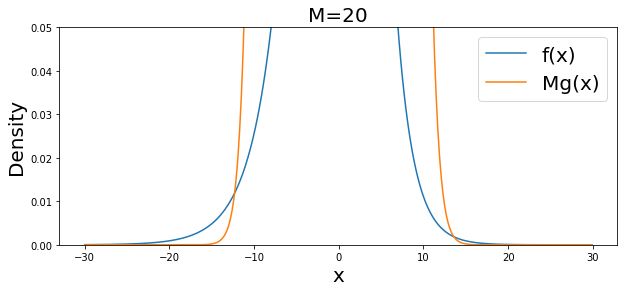

In [11]:
M = 20

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

plt.ylim(0,.05)

- There is some part where f(x) overlaps the proposed distribution but since its not big we'll ignore it 

In [12]:
M = 20
samples = []

N = 1000000

for _ in range(N):
    #sampling a candidate
    
    theta = np.random.normal(0,3)
    acceptance_prob = f(theta)/(M*g(theta, 0,3) )
    
    #acceptance criteria
    
    if np.random.random() < acceptance_prob:
        samples.append(theta)
        
len(samples)

334495

In [13]:
print("Efficiency: %s"%round(len(samples) / N, 3))

Efficiency: 0.334


Text(0.5, 1.0, 'Empirical Exp. Value: 0.397\nTrue Exp. Value: 0.27')

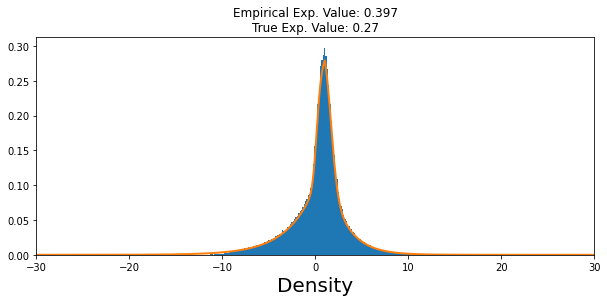

In [14]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=2)
plt.xlim(-30,30)

plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(samples),3),round(TRUE_EXPECTATION,2)))

## Case 1  - with proposal distribution - N(1,6)

Text(0.5, 1.0, 'M=1')

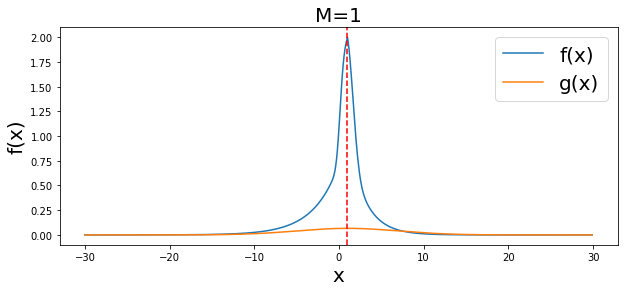

In [15]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 1,6)  
M = 1

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, g_vals)
plt.legend(['f(x)', 'g(x)' ], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.axvline(1, color='r', linestyle='--')

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=10')

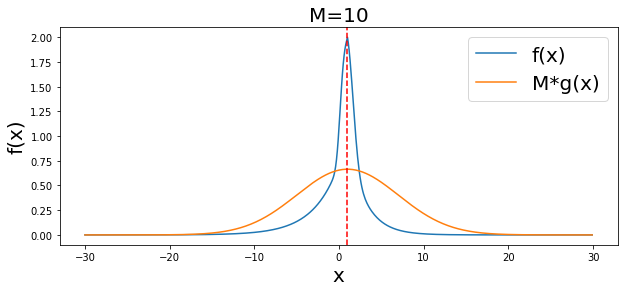

In [16]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
M = 10
g_vals = M*g(x_vals, 1,6)  


plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, g_vals)
plt.legend(['f(x)', 'M*g(x)' ], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.axvline(1, color='r', linestyle='--')

plt.title("M=%s"%M, fontsize=20)

Text(0.5, 1.0, 'M=50')

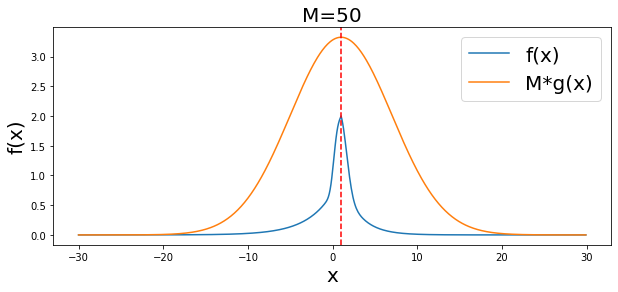

In [17]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
M = 50
g_vals = M*g(x_vals, 1,6)  


plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, g_vals)
plt.legend(['f(x)', 'M*g(x)' ], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.axvline(1, color='r', linestyle='--')

plt.title("M=%s"%M, fontsize=20)

(0.0, 0.05)

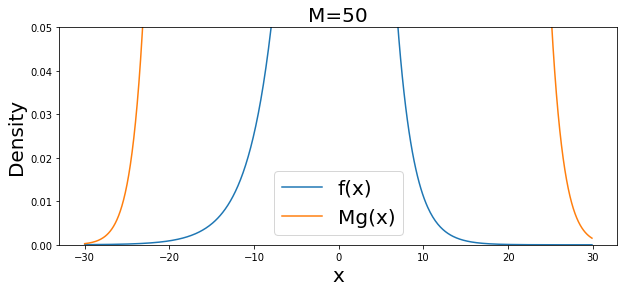

In [18]:
M = 50

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)

plt.title("M=%s"%M, fontsize=20)

plt.ylim(0,.05)

In [19]:
M = 50
samples = []

N = 1000000

for _ in range(N):
    #sampling a candidate
    
    theta = np.random.normal(1,6)
    acceptance_prob = f(theta)/(M*g(theta, 1,6) )
    
    #acceptance criteria
    
    if np.random.random() < acceptance_prob:
        samples.append(theta)
        
len(samples)

134846

In [20]:
print("Efficiency: %s"%round(len(samples) / N, 3))

Efficiency: 0.135


Text(0.5, 1.0, 'Empirical Exp. Value: 0.282\nTrue Exp. Value: 0.27')

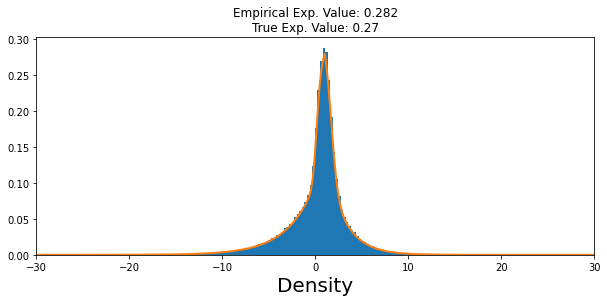

In [21]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=2)
plt.xlim(-30,30)

plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(samples),3),round(TRUE_EXPECTATION,2)))

Text(0.5, 1.0, 'Correlation: 0.0')

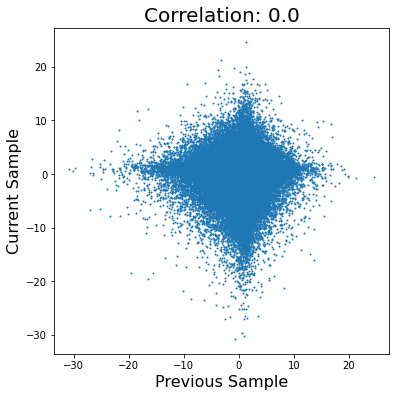

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(samples[:-1], samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)

- Doesnt take account of the previous values 

## MCMC - Metropolis hastings 

## Case 3 : Metropolis Algorithm with N(x , 6) Candidate

In [23]:
samples = [1]
N = 1000000
x = samples[0]
num_accpt = 0

for _ in range(N):
    theta = np.random.normal(x,6)
    alpha = min(1,(f(theta)/f(x)))
    
    #acceptance criteria 
    if np.random.random() < alpha :
        samples.append(theta)
        x = theta
        num_accpt += 1
    # otherwise the same sample again
    else:
        samples.append(x)

In [24]:
burn_in = 1000
retained_samples = samples[burn_in+1:]

In [25]:
print("Num Samples Collected: %s"%len(retained_samples))

Num Samples Collected: 999000


In [26]:
print("Efficiency: %s"%round(len(retained_samples) / N, 3))

Efficiency: 0.999


In [27]:
print("Fraction Acceptances: %s"%(num_accpt / N))

Fraction Acceptances: 0.385317


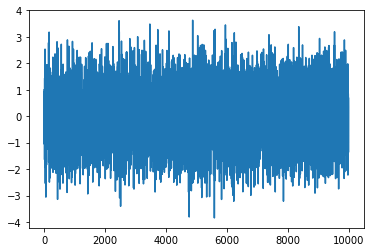

In [47]:
plt.plot(samples["x"])

Text(0.5, 1.0, 'Empirical Exp. Value: 0.266\nTrue Exp. Value: 0.272')

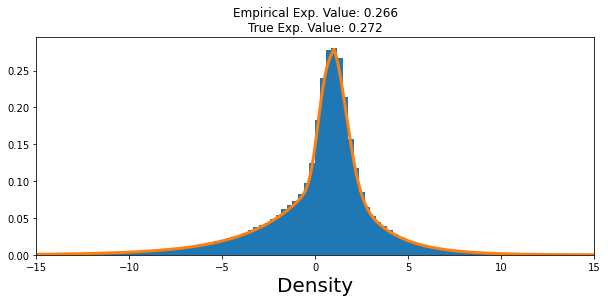

In [28]:
plt.figure(figsize=(10,4))
plt.hist(retained_samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=3)
plt.xlim(-15,15)

plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(samples),3),round(TRUE_EXPECTATION,3)))

Text(0.5, 1.0, 'Correlation: 0.73')

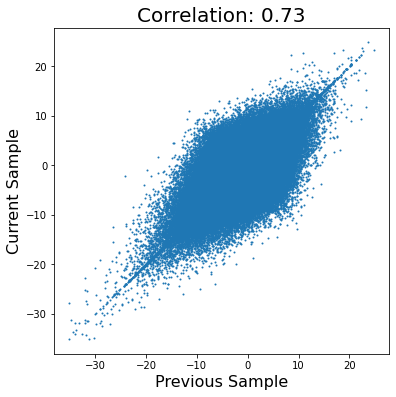

In [29]:
plt.figure(figsize=(6,6))
plt.scatter(retained_samples[:-1], retained_samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)

- As we can clearly see previous samples are highly related to the currents samples, so it takes into account of theprevious information

## Gibbs sampling -
- Only makes sense for multivariate distribution

In [30]:
# for comparison
auto_samples = np.random.multivariate_normal([0,0],[[1,0.5],[0.5,1]],10000)

In [31]:
auto_samples

array([[ 0.87973429, -0.33815386],
       [ 0.18199096,  1.28253842],
       [ 0.81370801,  0.09246397],
       ...,
       [ 0.11980766,  1.35777714],
       [ 0.38638902,  0.8689224 ],
       [-0.25549167, -1.43584533]])

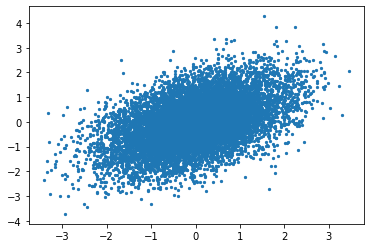

In [32]:
plt.scatter(auto_samples[:,0],auto_samples[:,1],s=5)

In [33]:
## Sapmpling
samples = {"x":[1],"y":[1]}

num_samples = 10000

for _ in range(num_samples):
    pres_y = samples["y"][-1] #latest y value
    
    #sampling x by condtional distribution on y 
    
    new_x  = np.random.normal(pres_y/2,np.sqrt(3/4)) #conditional distn of x
    new_y  = np.random.normal(new_x/2,np.sqrt(3/4)) #conditional distn of x
    samples['x'].append(new_x)
    samples['y'].append(new_y)
    


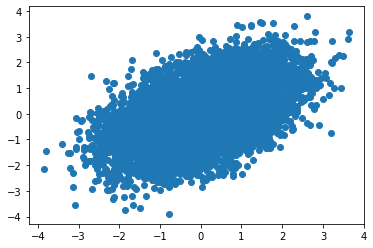

In [34]:
plt.scatter(samples["x"],samples["y"])

- This plot looks the same as from the original distn

In [38]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plt_plot_bivariate_normal_pdf(x, y, z):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.gca(projection='3d')
    ax.plot_surface(x, y, z, 
                  cmap=cm.coolwarm,
                  linewidth=0, 
                  antialiased=True)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');
    plt.show()

In [39]:
#Plotting original Samples
X, Y = np.meshgrid(auto_samples[:,0],auto_samples[:,1])
R = np.sqrt(X**2 + Y**2)
Z = ((1. / np.sqrt(2 * np.pi)) * np.exp(-.5*R**2))
plt_plot_bivariate_normal_pdf(X,Y,Z)

MemoryError: Unable to allocate 763. MiB for an array with shape (10000, 10000) and data type float64

In [40]:
#plotting generated samples
X, Y = np.meshgrid(samples["x"],samples["y"])
R = np.sqrt(X**2 + Y**2)
Z = ((1. / np.sqrt(2 * np.pi)) * np.exp(-.5*R**2))
plt_plot_bivariate_normal_pdf(X,Y,Z)

MemoryError: Unable to allocate 763. MiB for an array with shape (10001, 10001) and data type float64

- both the distributions look similar 

In [ ]:
### Marginal distributions
## For x 

plt.hist(auto_samples[:,0],bins = 40,density = True , alpha = 0.5)
plt.hist(samples["x"],bins = 40,density = True , alpha = 0.5)

(array([0.00103966, 0.00155949, 0.        , 0.00259916, 0.00207932,
        0.00623797, 0.01351561, 0.02079324, 0.03430885, 0.04106666,
        0.07433585, 0.0920101 , 0.13671558, 0.18090122, 0.20949193,
        0.26355437, 0.3176168 , 0.36128261, 0.35504464, 0.3727189 ,
        0.41898386, 0.39871045, 0.35348515, 0.32021596, 0.28486744,
        0.23704298, 0.20741261, 0.13047761, 0.10812487, 0.07589534,
        0.06341939, 0.04418564, 0.03067003, 0.01611476, 0.00883713,
        0.00571814, 0.00311899, 0.00103966, 0.00311899, 0.00051983]),
 array([-3.89689998, -3.70454903, -3.51219809, -3.31984715, -3.12749621,
        -2.93514527, -2.74279433, -2.55044338, -2.35809244, -2.1657415 ,
        -1.97339056, -1.78103962, -1.58868868, -1.39633773, -1.20398679,
        -1.01163585, -0.81928491, -0.62693397, -0.43458303, -0.24223208,
        -0.04988114,  0.1424698 ,  0.33482074,  0.52717168,  0.71952262,
         0.91187357,  1.10422451,  1.29657545,  1.48892639,  1.68127733,
         1.87362

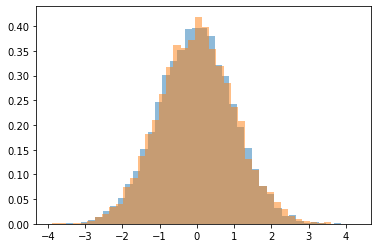

In [41]:
### Marginal distributions
## For y

plt.hist(auto_samples[:,1],bins = 40,density = True , alpha = 0.5)
plt.hist(samples["y"],bins = 40,density = True , alpha = 0.5)